In [39]:
import sys
import os
import numpy as np

np.random.seed(42)

정규방정식(normal equation)
- 비용함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법

$$
\hat{\theta} = \left({X}^TX\right)^{-1}{X}^T{\mathbf{y}}
$$

In [40]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

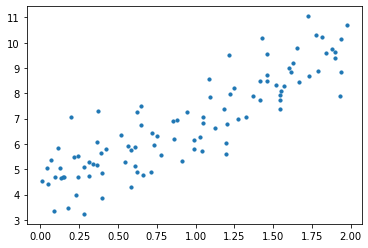

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)

In [42]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [43]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [45]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

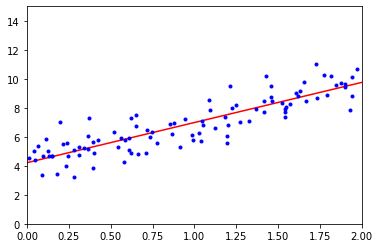

In [46]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [51]:
## 사이킷런을 이용한 선형 회귀

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [48]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [52]:
## scipy.linalg.lstsq() 함수(최소 제곱)를 이용

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [53]:
## 유사역행렬(무어펜로즈 역행렬)

np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

경사 하강법(Gradient Descent, GD)

In [55]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 무작위 초기화

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [56]:
theta

array([[4.21509616],
       [2.77011339]])

In [59]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")  # 훈련 세트 산점도

    n_iterations = 1000
    for iteration in range(n_iterations):

        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        # 조정되는 파라미터를 모두 리스트에 저장
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta={}$".format(eta), fontsize=16)

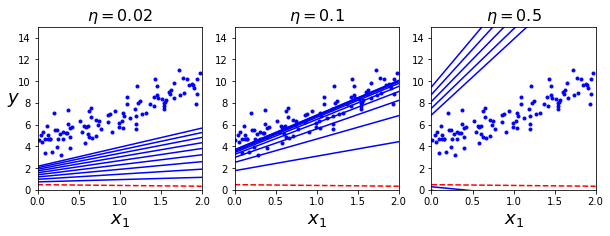

In [62]:
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 3))

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.01
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()